In [30]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import scipy.optimize as opt

# EGR 103 Spring 2019
# Exam 2 Review

## Overview: Exam 1

### Commonly missed questions

In [ ]:
a = 17.0
b = np.array([30, 40, 20, 50])
c = 'Yay for Tests'
d = [[1, 2], [3, 4], [5], [6, 7, 8, 9]]
g = a // 5
h = a % 5
k = b[1:]
#type(g)
#type(h)
#type(k)
n = c[6:3:-1] #val, type
#type(n)
o = max(c)  #val
s = d[1][1] #val
t = d[2]*2  #val

In [ ]:
#Problem 4.1
#Most common errors included: printing rolls incorrectly, looping incorrectly, and not returning
#Problem 5 3x3
#About a third of the class got this completely wrong
#Problem 5 Least Squares


## Logical Masks

- Parentheses are critical!
- & and | are critical!

When do you use logical masks? Most obvious use case is for a piecewise function, but it can be used to assign a desired value (mask) to a subset of values in a list or array (satisfying some arbitrary logical statement)

Example:

The Heaviside function $H(x)$ (also known as the unit step function) can be represented either as:

$$ H(x) = \left\{
        \begin{array}{ll}
            0 & \quad x < 0 \\
            1 & \quad x \geq 0
        \end{array}
    \right.
    $$
    
or as 

$$ H(x) = \left\{
        \begin{array}{ll}
            0 & \quad x < 0 \\
            1/2 & \quad x = 0 \\
            1 & \quad x > 0
        \end{array}
    \right.
    $$

A logical mask could be used to represent $H(x)$

In [ ]:
x = np.linspace(-5, 5, 100)
hMask0 = (x<0)
hMask1 = (x>=0)
hVal0 = 0
hVal1 = 1
heaviside = hMask0*hVal0 + hMask1*hVal1
plt.plot(x, heaviside, 'o')

## Dictionaries

Example: A dictionary of people you know, with how old they are

|  Friend | Age |
|:-------:|:---:|
| Andria  |  20 |
| Samuel  |  19 |
| Noreen  |  20 |
| Lourdes |  22 |
| Charley |  23 |

In [ ]:
# Create a dictionary
friends = {'Andria': 20,
           'Samuel': 19,
           'Noreen': 20,
           'Lourdes': 22,
           'Charley': 23}
# Add a new friend:
friends['Teddy'] = 22
# Update value: Samuel had a birthday!
friends['Samuel']+=1
'Andria' in friends
'James' in friends
friends.setdefault('Joe', 40)
friends.setdefault('Andria', 40)


## Strings and Files

In [ ]:
st = 'Alphabet'
## Given a letter, what is the ASCII representation?
for ch in st:
    print(ord(ch))
## Given a number, what is the ASCII character?
for n in range(0,255):
    print(n, chr(n))

In [13]:
# File I/O practice: read in one file, write every other word out to another file
def filecp_half(fOld):
    fTXT = open(fOld, 'r')
    fNew = fOld.split('.')
    fNewName = fNew[0] + '_cpy.txt'
    fNew = open(fNewName ,'w')
    flag = True
    for line in fTXT:
        for word in line.split():
            if flag:
                fNew.write(word + ' ')
                flag = False
            else:
                flag = True
    fTXT.close()         
    return fNewName


f = open(filecp_half('the_raven.txt'))
for line in f:
    print(line)

1845 RAVEN Edgar Poe upon midnight while pondered, and Over a and volume forgotten While nodded, napping, there a As some gently rapping my door. some I "tapping my door- this, nothing Ah, I it in bleak And separate ember its upon floor. I the vainly had to From books of sorrow the Lenore- the and maiden the name Nameless for And silken uncertain of purple Thrilled filled with terrors felt So now, still beating my I repeating, some entreating at chamber Some visitor entrance my door;- it and more." my grew hesitating no "Sir," I, Madam, your I But fact I napping, so you rapping, so you tapping, at chamber That scarce sure heard here opened the Darkness and more. into darkness long stood wondering, Doubting, dreams mortals dared dream But silence unbroken, the gave token, the word spoken the word, This whispered, an murmured the "Lenore!"- this, nothing Back the turning, my within burning, again heard tapping louder before. said "surely is at window Let see, what is, this explore- my be

In [28]:
# Loading data from file -- typically either .dat or .csv
# Data from FBI report on crime, 1997-2016
# First column: year
# Second column: Population
# Third: total number of Violent crimes
# Fourth: Number of Murders
# Fifth: Number of Robberies
data = np.loadtxt('fbiData.csv',skiprows=1, delimiter=',')

#Split this into row vectors
#Plot population vs. year
#Plot violent crime vs. year
#Plot violent crime vs. population
#Plot murder v. robbery


## Linear Algebra

### Calculate Determinants

2x2 matrices:

$$A = \begin{bmatrix} 
a & b \\
c & d 
\end{bmatrix}$$

$$\det(A) = ad - bc $$

3x3 matrices:

$$B = \begin{bmatrix} 
a & b & c\\
d & e & f\\
g & h & i
\end{bmatrix}$$


$$\det(B) = a\times\det\begin{pmatrix} 
e & f \\
h & i 
\end{pmatrix} -
b\times\det\begin{pmatrix} 
d & f \\
g & i 
\end{pmatrix} +
c\times\det\begin{pmatrix} 
d & e \\
g & h 
\end{pmatrix}$$

$$\det(B) = a(ei-fh)-b(di-fg)+c(dh-eg)$$

### Inverses

2x2 matrix:

$$A = \begin{bmatrix} 
a & b \\
c & d 
\end{bmatrix}$$

$$ A^{-1} = \frac{1}{\det(A)}\begin{bmatrix} 
d & -b \\
-c & a 
\end{bmatrix}$$


In [ ]:
A = np.array([[15, 5, 10], 
              [1, 2, 6],
              [5, 9, -3]])
#Calculate determinant and inverse of A
detA = #FILL IN
invA = #FILL IN

Example: Equations to Matrix form (From Fall 2018 Exam 2)

Three masses $M_i$ are at stationary positions $x_i$ and are connected by a series of large springs with known spring constants $K_1$ through $K_4$. The position of the last mass, $x_3$, is known but neither the positions of the first two masses ($x_1$ and $x_2$) are known nor is the amount of force $F$ required to get mass 3 where it is. The equilibrium equations for the positions of the masses as functions of the applied forces are:

$$\begin{align*}
K_1x_1+K_2x_1 - K_2x_2 &= 0\\
-K_2x_1+K_2x_2+K_3x_2-K_3x_3&=0\\
-K_3x_2+K_3x_3+K_4x_3-F&=0
\end{align*}$$

Rearrange and write the above in matrix form.

In [ ]:
# Solving the above system of equations: Assume K1=5, K2=1, K3=2, K4=15
# Setup in form: Ax = b
A = #FILL IN
b = #FILL IN

x = #SOLVE HERE

### Sweep through possible parameter changes


### Norms

#### 1D Arrays (Vectors)

- 1-Norm: $$||\vec{v}||_1 = \sum_{i=1}^n|x_i|$$
- 2-Norm: $$||\vec{v}||_2 = \sqrt{\sum_{i=1}^n x_i^2}$$
- $\inf$-Norm: $$||\vec{v}||_{\inf} = \underset{1\leq i\leq n}{\max} |x_i|$$

#### 2D Arrays (Matrices)

- 1-Norm: $$||A||_1 = \max_{j}\sum_{i=1}^n|a_{ij}|$$
- $\inf$-Norm: $$||A||_{\inf} = \max_i \sum_{j=1}^n|a_{ij}|$$
- Frobenius-Norm: $$||A||_{fro} = \sqrt{\sum_{j=1}^m\sum_{i=1}^n a_{ij}^2}$$

What are these? 1-Norm is the maximum column sum, Inf-Norm is maximum row sum. 2-norm 

In [ ]:
# Norms and Condition Numbers
# Computing these is easy: just use linalg

v = np.array([1, 2, 3, 4, 5, 6])
v1norm = np.linalg.norm(v, ord=1)
v2norm =
vINFnorm =

A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
A1norm = 
AFROnorm =
AINFnorm =
A2norm =


### Condition Numbers

$$\mathrm{cond}(A) = ||A||\cdot||A^{-1}||$$

Take the matrix, calculate the inverse, then find the condition number of the original ($A$) and inverse ($A^{-1}$) and multiply them. 

What is a condition number? Condition numbers have to deal with accuracy of your system.

_From Pundit:_

A condition number of a matrix gives an idea of the sensitivity of the solution relative to the sensitivity of the measurements. The larger the condition number, the more difficult the geometry and thus the more prone to error the results are to measurement errors. The rule of thumb is that your final answer will have as many digits of precision as the number of digits in your measurements minus the base-10 logarithm of the condition number.

For instance, if you take measurements to 5 significant figures and your system has a condition number of 100, you expectation is that your solution is accurate to $5-\log_{10}(100)=5-2=3$ digits.

You generally report ranges of digits if the condition number is not an integer power of 10. For instance, if you know your measurements to 9 figures and your condition number of 485, $\log_{10}(485)=2.69$ so you will lose between 2 and 3 digits of precision meaning you know your final answers to within 6-7 digits (9 minus 2 or 3).

In [ ]:
#Calculating condition numbers

A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
aCond1 = np.linalg.cond(A, p=np.inf)
aCond2 =
aCondInf =
aCondFro =

- Write code that finds coefficients for polynomial, general linear, and nonlinear fits; you will be given the following:
 - For polynomial fits, the order of the fit
 - For general linear or nonlinear, the model equation
- Write code that determines the sum of the squares of data residuals for a data set as well as both the sum of the squares of the estimate residuals and the coefficient of determination for a given fit
- Be able to describe if a fit is mathematically good based on the $r^2$ value
 - $r^2>0.95$ is a "good fit"
 - $r^2<0$ means the fit is worse than merely picking the average value of the data

## Curve Fitting

### Polynomial Fit

This is the easiest of the fits we cover: you are simply fitting to a polynomial expression, of some set degree.

Here, we have been using the following variables:

- ```p``` the coefficients of the polynomial fit
- ```yhat``` the y values given by evaluating the original x values in the polynomial expression
- ```xmodel``` a continuous series of x values to test the model with
- ```ymodel``` y values for a continuous series of x values

In [ ]:
#For some x, y, and n as the degree of the fit
p = np.polyfit(x, y, n)

yhat = np.polyval(p, x)
ymodel = np.polyval(p, xmodel)


### Linear Regressions

The equation built by linear regressions is: 

$$\hat{y}(x)=\sum_{j=1}^{M}c_j\phi_j(x)$$

where $c_j$ are the coefficients of the fit and the $\phi_j$ are the specific functions of the independent variable that make up the fit.

Example: a generic polynomial fit could be of the form $y = c_0\phi_0(x) + c_1\phi_1(x) + c_2\phi_2(x)$, where $\phi_0(x) = x^2$, $\phi_1(x) = x^1$, $\phi_2(x) = x^0$.

When we do this, our ```yfun``` is used to evaluate values __after__ we solve for our fit.

The linear least squares regression takes in a matrix, which is why we use np.block.

In [ ]:
# This is the general way to solve for a linear regression:
def yfun(xe, coefs):
    return coefs[0] * x**1 + coefs[1] * x**0 #THIS IS ANY FUNCTION

xv = np.reshape(x, (-1, 1))
yv = np.reshape(y, (-1, 1))
a_mat = np.block([[xv**1, xv**0]])
pvec = np.linalg.lstsq(a_mat, yv, rcond=None)[0]

yhat = yfun(x, pvec)

### Nonlinear Regression

## Surfaces

- The imports will be given to you
- You need to know how to properly create a figure and an axis for doing 3D projections
- Know how `np.meshgrid()` works, what the arguments are, and what it returns
- Know how `ax.plot_wireframe()` and `ax.plot_surface()` work
- Know how to use `ax.set()` for setting axis labels, axis limits, and axis tick locations.
- For the test, the surfaces will be functions of x and y and will be plotted using Cartesian coordinates.
- Neither colormaps (cmap) nor facecolors nor colorbars will be tested

Surface plots are used for three-dimensional functions -- instead of $y(x)$ we have $z(x,y)$

In [42]:
#np.meshgrid, np.arange, np.linspace

a = np.arange(0, 10, 1)
b = np.linspace(0,10,11)
a,b

c = np.meshgrid(a, b)
c

[array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]),
 array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
        [ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.],
        [ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.],
        [ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.],
        [ 6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.],
        [ 7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.],
        [ 8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.],
        [ 9.,  9.,

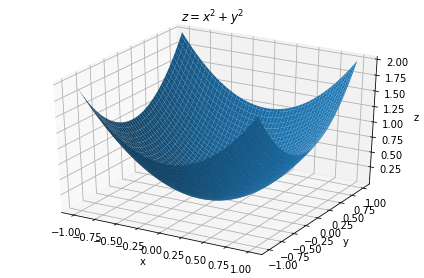

In [46]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

fig = plt.figure(num=1)
fig.clf()
ax = fig.add_subplot(1, 1, 1, projection='3d')


ax.plot_surface(X,Y,Z)
ax.set(xlabel='x', ylabel='y', zlabel='z', title='$z = x^2 + y^2$')

fig.tight_layout()

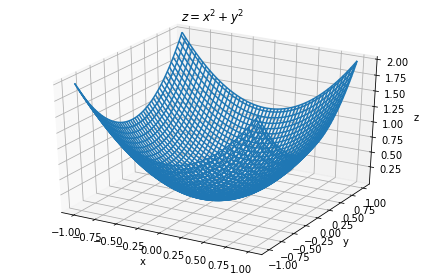

In [47]:
fig = plt.figure(num=2)
fig.clf()
ax = fig.add_subplot(1, 1, 1, projection='3d')


ax.plot_wireframe(X,Y,Z)
ax.set(xlabel='x', ylabel='y', zlabel='z', title='$z = x^2 + y^2$')

fig.tight_layout()

In [48]:
'''
ax.set(xlabel='x', 
       ylabel='y', 
       zlabel='z',
       xlim = [-4, 4],
       ylim = [-4, 4],
       zlim = [-4, 4],
       xticks = [-4, -2, 2, 4],
       yticks = [-4, -2, 2, 4],
       zticks = [-1, 0, 1],
       title='Donut!')
'''

"\nax.set(xlabel='x', \n       ylabel='y', \n       zlabel='z',\n       xlim = [-4, 4],\n       ylim = [-4, 4],\n       zlim = [-4, 4],\n       xticks = [-4, -2, 2, 4],\n       yticks = [-4, -2, 2, 4],\n       zticks = [-1, 0, 1],\n       title='Donut!')\n"

## Finding Roots

- You will only be required to find roots on continuous functions for which you will be given sufficient information to find a bracket.
- You will only be required to understand how `opt.brentq()` works to find roots using a closed method.
- Remember that a valid bracket consists of two independent values for which a function has opposite signs.
- `opt.brentq()` can only find one root at a time; if you are finding multiple roots, you either need multiple commands or a loop
- If you are trying to determine where a function is equal to a value other than 0, you can create a lambda function for that. For instance, to find where some function f is equal to 8 between x values of 1 and 3, you could write:

```rootloc = opt.brentq(lambda thing: f(thing)-8, 1, 3)```

## Finding Extrema

- For 1D functions, you will only be required to find extrema on continuous functions for which you will be given sufficient information to decide boundaries - this means understanding how `opt.fminbound()` works to find bounded minima and what slight changes to make to find maxima.
- For 2D functions, you will only be required to find extrema on continuous functions for which you will be given sufficient information to decide initial guesses - this means understanding how `opt.fmin()` works to find unbounded minima on surfaces, what slight changes to make to find maxima, and how to use * to have a function call split a list into component parts.
- `opt.fminbound()` and `opt.fmin()` can only find one extremum at a time; if you are finding multiple extrema, you either need multiple commands or a loop
- If you are finding a maximum, remember that you will really be minimizing the negative version of a function. And you cannot simply put - in front of the function handle; instead, create a lambda function in the argument -- for example:

```maxloc = opt.fminbound(lambda blah: -f(blah), -1, 2)```

# Exercises

## Exercise 1 –– Basic Strings

(From w3resource.com)

Write a python function, ```letter_count``` to return the count of each letter in a string.

Input: A string of any length (len$\geq$0)

Output: A reasonable data structure (either a dictionary or a list).

Extra: Your function should return a data structure with _only_ the letters present in the string. 

In [ ]:
def letter_count(str):
    

## Exercise 2 –– Strings and Files

Write a function, ```whole_alphabet``` that takes in a file name, and returns how many letters need to be read before encountering every letter in the alphabet. Ignore letter case. 

Input: file name

Output: index of letter that gives the whole alphabet, or -1 if not all letters present.
